In [134]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [135]:
file_data = pd.read_csv('Datasets/zomato.csv',encoding='iso-8859-1')
file_data = file_data[file_data['Country Code']==1]

In [136]:
df = file_data.copy()

# Plot the bar graph top 15 restaurants have a maximum number of outlets.

### First we have calculated the counts of all the restaurant and taking top -15 from them and plotted the bar graph for the same

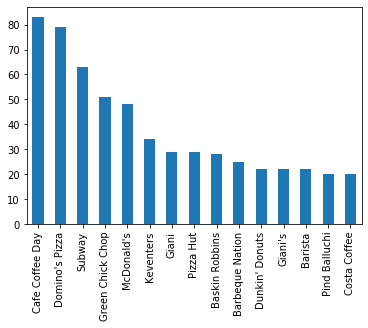

In [137]:
fig = df['Restaurant Name'].value_counts()[:15].plot(kind='bar').get_figure()
fig.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')

In [5]:
df['Restaurant Name'].value_counts()[:10]

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Giani               29
Pizza Hut           29
Baskin Robbins      28
Barbeque Nation     25
Name: Restaurant Name, dtype: int64

# Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028395DC9E88>]],
      dtype=object)

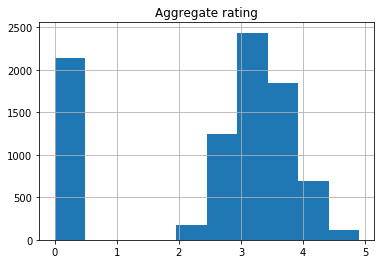

In [143]:
df.hist(column='Aggregate rating')

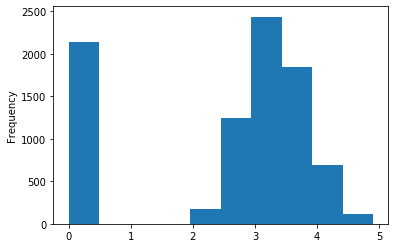

In [144]:
fig = df['Aggregate rating'].plot(kind='hist').get_figure()
fig.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')

# Plot the bar graph top 10 restaurants in the data with the highest number of votes.

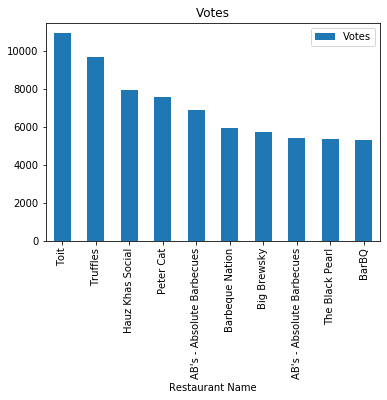

In [145]:
ans = df.sort_values(['Votes'], ascending=[False])[:10]
fig = ans.plot(x='Restaurant Name', y='Votes', kind = 'bar',title='Votes').get_figure()
fig.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')

# Plot the pie graph of top 10 cuisines present in restaurants in the USA.

In [9]:
usa_data = pd.read_csv('Datasets/zomato.csv',encoding='iso-8859-1')
usa_data = usa_data[usa_data['Country Code']==216]
set(usa_data.Cuisines)

{'American',
 'American, Asian, Burger',
 'American, BBQ',
 'American, BBQ, Burger',
 'American, BBQ, Sandwich',
 'American, BBQ, Seafood',
 'American, BBQ, Southern',
 'American, BBQ, Steak',
 'American, Bar Food',
 'American, Bar Food, BBQ',
 'American, Bar Food, Sandwich',
 'American, Breakfast',
 'American, Breakfast, Burger',
 'American, Breakfast, Desserts',
 'American, Breakfast, Diner',
 'American, Breakfast, Greek',
 'American, Breakfast, Hawaiian',
 'American, Breakfast, Vegetarian',
 'American, Burger',
 'American, Burger, Cajun',
 'American, Burger, Pizza, Cafe',
 'American, Burger, Sandwich',
 'American, Caribbean, Seafood',
 'American, Chinese, Sushi',
 'American, Coffee and Tea',
 'American, Desserts, Diner',
 'American, Desserts, Steak',
 'American, Diner, Southern',
 'American, European, Sandwich',
 'American, Fast Food',
 'American, French',
 'American, Greek',
 'American, Greek, Seafood',
 'American, Hawaiian',
 'American, International, Southwestern',
 'American, In

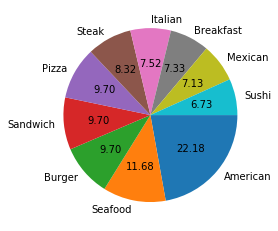

In [152]:
d = {}
for i in usa_data.Cuisines:
    x = str(i).split(', ')
    for j in x:
        d[j] = d.get(j,0) + 1
        
d = sorted(d.items(),key = lambda x:x[1],reverse=True)[:10]
d = dict(d)
plt.pie(d.values(),labels=d.keys(),autopct='%.2f',counterclock=False)
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()

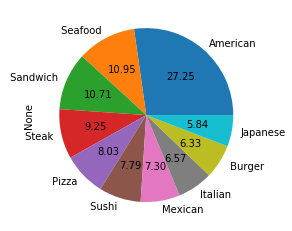

In [11]:
df4 = pd.read_csv('Datasets/zomato.csv',encoding='iso-8859-1')
df4 = df4[df4['Country Code']==216]
df4 = df4[['Cuisines']]
df4 = df4[df4['Cuisines'].notnull()]

def foo(a):
    s = a.split(',')
    return s

df4['Cuisines'] = df4['Cuisines'].apply(lambda x: foo(x))

df4.reset_index(inplace=True)
rows = []
_ = df4.apply(lambda row: [rows.append([nn])for nn in row.Cuisines], axis=1)

df_new = pd.DataFrame(rows, columns=['cuisine'])

df_new.groupby('cuisine').size().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%.2f')

# Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

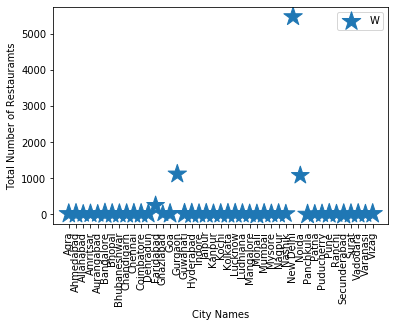

In [153]:
df = pd.read_csv('Datasets/zomato.csv',encoding='iso-8859-1')
df = df[df['Country Code']==1]
df['V*R'] = df['Aggregate rating']*df['Votes']
ans = df.groupby('City').agg(['sum','count'])
ans = ans[['V*R','Votes']]
ans['ans'] = ans['V*R']['sum']/ans['Votes']['sum']
ans.columns = ans.columns.droplevel()

#del ans['V*R']
ans = ans.reset_index(drop=False)
del ans['sum']
ans.columns = ['city','count','c','ans']
del ans['c']
ans.reset_index(drop=True)
ans.columns = ['city','count','ans']
xi = np.array(ans.city)
yi = np.array(ans['count'])
xt = np.array(ans.ans)

plt.scatter(x=xi,y=yi,s=xt*100,marker='*')
plt.xlabel('City Names')
plt.ylabel('Total Number of Restauramts')
plt.xticks(rotation=90)
plt.legend('Weighted Restaurant Rating')
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()
